In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE

In [79]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingClassifier

In [88]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
df_train=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/zindi/financial_inclusion/Train.csv')
df_train.shape

(23524, 13)

In [7]:
df_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [8]:
df_test=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/zindi/financial_inclusion/Test.csv')
df_test.shape

(10086, 12)

In [9]:
df_test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


Let's merge the two datasets for the ease of doing EDA. We will separate it again at the time of model building.

In [10]:
df_train['source']='train'
df_test['source']='test'

In [11]:
df=pd.concat([df_train,df_test],axis=0)
df.shape

(33610, 14)

In [12]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,source
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,train
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,train
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,train
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,train
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,train


In [13]:
#Checking for data types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33610 entries, 0 to 10085
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 33610 non-null  object
 1   year                    33610 non-null  int64 
 2   uniqueid                33610 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           33610 non-null  object
 5   cellphone_access        33610 non-null  object
 6   household_size          33610 non-null  int64 
 7   age_of_respondent       33610 non-null  int64 
 8   gender_of_respondent    33610 non-null  object
 9   relationship_with_head  33610 non-null  object
 10  marital_status          33610 non-null  object
 11  education_level         33610 non-null  object
 12  job_type                33610 non-null  object
 13  source                  33610 non-null  object
dtypes: int64(3), object(11)
memory usage: 3.8+ MB


We can see that we have some categoric and some numeric columns in our dataset. We can also observe that there are no missing values in the dataset.

In [15]:
#Summary Statistics

In [16]:
df.describe()

,year,household_size,age_of_respondent
count,33610.000000,33610.000000,33610.000000
mean,2016.975930,3.791877,38.656114
std,0.847353,2.223138,16.447127
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [17]:
#Plotting independent features against target column

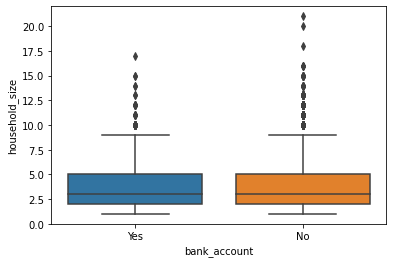

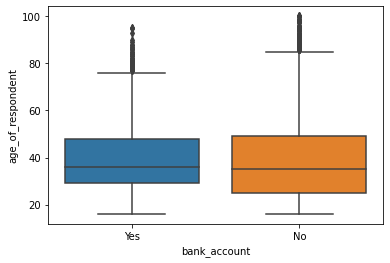

In [18]:
cols=['household_size','age_of_respondent']

for col in cols:
    sns.boxplot(x='bank_account',y=col,data=df)
    plt.show()

Observations:
    families with more no. of members, generally do not have a bank account.
    Families with higher age group members, generally do not have a bank account.

In [19]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'source'],
      dtype='object')

In [20]:
#Visualisations

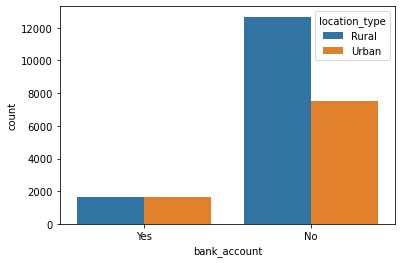

In [21]:
sns.countplot(x='bank_account',hue='location_type',data=df)
plt.show()

We can see it clearly that there are people from Rural area who do not have a bank account as compared to Urban area.

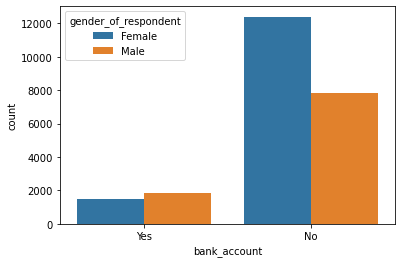

In [22]:
sns.countplot(x='bank_account',hue='gender_of_respondent',data=df)
plt.show()

There are less number of females as compared to males, who has a bank account.

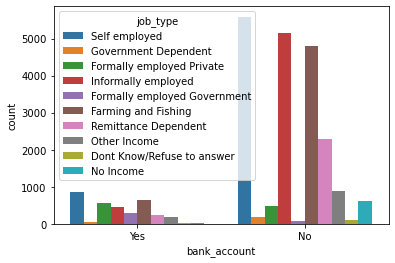

In [23]:
sns.countplot(x='bank_account',hue='job_type',data=df)
plt.show()

We can see clearly that there are most instances of people from Self employed sector not having a bank account, may be because they would be dealing with hard cash for daily transactions. It is followed by people from 'Informally employed' and 'Farming and Fishing', because they may not be having regular cash inflow, or not sufficient money to save for future.

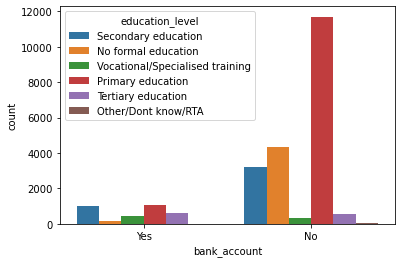

In [24]:
sns.countplot(x='bank_account',hue='education_level',data=df)
plt.show()

There are most instances of people with Primary education level, who do not have a bank account.

In [25]:
#Feature Engineering

Let's convert the household_size and age_of_respondent to categorical column.

In [26]:
df.age_of_respondent.min(),df.age_of_respondent.max()

(16, 100)

In [27]:
df['respondent_age']=pd.cut(df.age_of_respondent,bins=[10,30,60,101],labels=['young','middle','old'])

In [28]:
df.respondent_age.value_counts()

middle    16526
young     13085
old        3999
Name: respondent_age, dtype: int64

In [29]:
df.household_size.min(),df.household_size.max()

(1, 21)

In [30]:
df['family_size']=pd.cut(df.household_size,bins=[0,3,6,22],labels=['small','medium','large'])

In [31]:
df['family_size'].value_counts()

small     17436
medium    12074
large      4100
Name: family_size, dtype: int64

In [32]:
#Dropping the respondent_age and household_size column since we do not require it now.

df=df.drop(['age_of_respondent','household_size'],axis=1)

In [33]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,source,respondent_age,family_size
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed,train,young,small
1,Kenya,2018,uniqueid_2,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent,train,old,medium
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,train,young,medium
3,Kenya,2018,uniqueid_4,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,train,middle,medium
4,Kenya,2018,uniqueid_5,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed,train,young,large


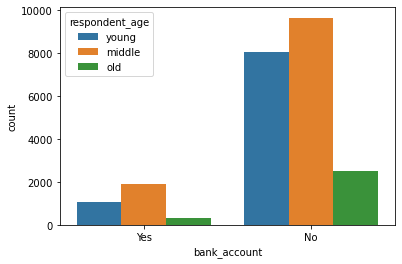

In [34]:
sns.countplot(x='bank_account',hue='respondent_age',data=df)
plt.show()

In [35]:
#Creating a backup file

In [36]:
df1=df.copy(deep=True)

There are more cases of middle aged people who do not have a bank account, may be because of meeting their family requirements.

In [94]:
df1.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,source,respondent_age,family_size
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed,train,young,small
1,Kenya,2018,uniqueid_2,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent,train,old,medium
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,train,young,medium
3,Kenya,2018,uniqueid_4,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,train,middle,medium
4,Kenya,2018,uniqueid_5,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed,train,young,large


In [38]:
#Separating the train and test set

In [39]:
df_train=df1.loc[df['source']=='train']
df_test=df1.loc[df['source']=='test']

In [40]:
df_train.shape,df_test.shape

((23524, 14), (10086, 14))

In [41]:
df_train1=df_train.drop(['uniqueid','source'],axis=1)

In [42]:
df_test1=df_test.drop(['uniqueid','source','bank_account'],axis=1)

In [43]:
df_train1.shape,df_test1.shape

((23524, 12), (10086, 11))

In [44]:
#Dummy Encoding the Categorical Variables

In [45]:
#for train set

In [46]:
#Label Encoding the Target Variable

In [47]:
le=LabelEncoder()

In [48]:
df_train1['bank_account']=le.fit_transform(df_train1['bank_account'])

In [49]:
df_train1['bank_account'].value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

We can see that the class is not balanced. So we need to balance it using SMOTE.

In [50]:
#One Hot Ecoding of other categorical variables

In [51]:
df_train1_dummy=pd.get_dummies(df_train1,drop_first=True)

In [52]:
#for test set

In [53]:
df_test1_dummy=pd.get_dummies(df_test1,drop_first=True)

In [54]:
#Splitting into X and y

In [55]:
X_train=df_train1_dummy.drop('bank_account',axis=1)
y_train=df_train1_dummy['bank_account']

In [56]:
X_test=df_test1_dummy

In [57]:
X_train.shape,y_train.shape,X_test.shape

((23524, 34), (23524,), (10086, 34))

In [58]:
#Balancing the target class in train data set

In [59]:
oversample=SMOTE()

In [60]:
X_train,y_train=oversample.fit_resample(X_train,y_train)

In [61]:
y_train.value_counts()

1    20212
0    20212
Name: bank_account, dtype: int64

We can see that the classes are balanced now.

In [62]:
X_train.shape,y_train.shape,X_test.shape

((40424, 34), (40424,), (10086, 34))

In [63]:
#Scaling the data

In [64]:
sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [65]:
#Model Building

1.Logistic Regression

In [66]:
lr=LogisticRegression()

lr.fit(X_train_scaled,y_train)

y_pred_train=lr.predict(X_train_scaled)
y_pred_test=lr.predict(X_test_scaled)

print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))

submit_lr=pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": y_pred_test})
submit_lr.to_csv('financial_inclusion.submit_lr.csv',index=False)

Training Accuracy:  0.7676380368098159


2.DecisionTree Classifier

In [67]:
dt=DecisionTreeClassifier()

dt.fit(X_train_scaled,y_train)

y_pred_train=dt.predict(X_train_scaled)
y_pred_test=dt.predict(X_test_scaled)

print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))

submit_dt=pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": y_pred_test})
submit_dt.to_csv('financial_inclusion.submit_dt.csv',index=False)

Training Accuracy:  0.8650801504056996


3.RandomForest Classifier

In [68]:
rf=RandomForestClassifier()

rf.fit(X_train_scaled,y_train)

y_pred_train=rf.predict(X_train_scaled)
y_pred_test=rf.predict(X_test_scaled)

print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))

submit_rf=pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": y_pred_test})
submit_rf.to_csv('financial_inclusion.submit_rf.csv',index=False)

Training Accuracy:  0.8650801504056996


4.GridSearchCV_RF

In [69]:
tuned_parameters={'n_estimators':[85,100],'min_samples_split':[15,20],'max_depth':[8,10]}

gs_model=GridSearchCV(estimator=rf,param_grid=tuned_parameters,cv=5)
gs_model.fit(X_train_scaled,y_train)

print('best parameters are: ',gs_model.best_params_)

best parameters are:  {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 100}


In [70]:
rf1=RandomForestClassifier(n_estimators=100,min_samples_split=15,max_depth=10)

rf1.fit(X_train_scaled,y_train)

y_pred_train=rf1.predict(X_train_scaled)
y_pred_test=rf1.predict(X_test_scaled)

print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))

submit_rf1=pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": y_pred_test})
submit_rf1.to_csv('financial_inclusion.submit_rf1.csv',index=False)

Training Accuracy:  0.7920789629922819


5.GradientBoostingClassifier

In [71]:
gb=GradientBoostingClassifier()

gb.fit(X_train_scaled,y_train)

y_pred_train=gb.predict(X_train_scaled)
y_pred_test=gb.predict(X_test_scaled)

print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))

submit_gb=pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": y_pred_test})
submit_gb.to_csv('financial_inclusion.submit_gb.csv',index=False)

Training Accuracy:  0.7732040372056205


6.AdaBoostClassifier

In [72]:
ab=AdaBoostClassifier()

ab.fit(X_train_scaled,y_train)

y_pred_train=ab.predict(X_train_scaled)
y_pred_test=ab.predict(X_test_scaled)

print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))

submit_ab=pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": y_pred_test})
submit_ab.to_csv('financial_inclusion.submit_ab.csv',index=False)

Training Accuracy:  0.7582376805857907


7.XGBClassifier

In [73]:
xgb=XGBClassifier()

xgb.fit(X_train_scaled,y_train)

y_pred_train=xgb.predict(X_train_scaled)
y_pred_test=xgb.predict(X_test_scaled)

print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))

submit_xgb=pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": y_pred_test})
submit_xgb.to_csv('financial_inclusion.submit_xgb.csv',index=False)

Training Accuracy:  0.8248565208786859


8.LGBMClassifier

In [74]:
lgb=LGBMClassifier()

lgb.fit(X_train_scaled,y_train)

y_pred_train=lgb.predict(X_train_scaled)
y_pred_test=lgb.predict(X_test_scaled)

print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))

submit_lgb=pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": y_pred_test})
submit_lgb.to_csv('financial_inclusion.submit_lgb.csv',index=False)

Training Accuracy:  0.8147140312685534


9.SGDClassifier

In [75]:
sgd=SGDClassifier()

sgd.fit(X_train_scaled,y_train)

y_pred_train=sgd.predict(X_train_scaled)
y_pred_test=sgd.predict(X_test_scaled)

print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))

submit_sgd=pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": y_pred_test})
submit_sgd.to_csv('financial_inclusion.submit_sgd.csv',index=False)

Training Accuracy:  0.7660300811399169


10.CatBoostClassifier

In [76]:
cb=CatBoostClassifier(logging_level='Silent')

cb.fit(X_train_scaled,y_train)

y_pred_train=cb.predict(X_train_scaled)
y_pred_test=cb.predict(X_test_scaled)

print('Training Accuracy: ',accuracy_score(y_train,y_pred_train))

submit_cb=pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": y_pred_test})
submit_cb.to_csv('financial_inclusion.submit_cb.csv',index=False)

Training Accuracy:  0.829160894518108


11.Stacking

In [81]:
dt1=DecisionTreeClassifier()

stack=StackingClassifier(classifiers=[dt,gb,lgb,xgb,cb],meta_classifier=dt1)

model_stack=stack.fit(X_train,y_train)

pred_stack_train=model_stack.predict(X_train)
pred_stack_test=model_stack.predict(X_test)

print('Training Accuracy: ',accuracy_score(y_train,pred_stack_train))

submit_stack=pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": pred_stack_test})
submit_stack.to_csv('financial_inclusion.submit_stack.csv',index=False)

Training Accuracy:  0.8650801504056996


In [82]:
xgb1=XGBClassifier()

stack=StackingClassifier(classifiers=[xgb,cb],meta_classifier=xgb1)

model_stack=stack.fit(X_train,y_train)

pred_stack_train=model_stack.predict(X_train)
pred_stack_test=model_stack.predict(X_test)

print('Training Accuracy: ',accuracy_score(y_train,pred_stack_train))

submit_stack1=pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": pred_stack_test})
submit_stack1.to_csv('financial_inclusion.submit_stack1.csv',index=False)

Training Accuracy:  0.829160894518108


12.Nueral Network

In [90]:
classifier=Sequential()

classifier.add(Dense(34,kernel_initializer='uniform',activation='relu',input_dim=34))
classifier.add(Dense(34,kernel_initializer='uniform',activation='relu'))

classifier.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

classifier.summary()

classifier.fit(X_train,y_train,batch_size=32,epochs=50)

y_pred_test=classifier.predict(X_test)

y_pred_test=np.round(y_pred_test)

y_pred_train=classifier.predict(X_train)

y_pred_train=np.round(y_pred_train)

print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

y_pred_test=y_pred_test.flatten()

y_pred_test

submit_NN=pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": y_pred_test})
submit_NN.to_csv('financial_inclusion.submit_NN.csv',index=False)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 34)                1190      
                                                                 
 dense_4 (Dense)             (None, 34)                1190      
                                                                 
 dense_5 (Dense)             (None, 1)                 35        
                                                                 
Total params: 2,415
Trainable params: 2,415
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1264/1264 [==============================] - 4s 3ms/step - loss: 0.6596 - accuracy: 0.5777
Epoch 2/50
1264/1264 [==============================] - 3s 3ms/step - loss: 0.5343 - accuracy: 0.7290
Epoch 3/50
1264/1264 [==============================] - 3s 3ms/step - loss: 0.5147 - accuracy: 0.7393
Epoch 4/50

In [92]:
classifier=Sequential()

classifier.add(Dense(34,kernel_initializer='uniform',activation='relu',input_dim=34))
classifier.add(Dense(34,kernel_initializer='uniform',activation='relu'))

classifier.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

classifier.compile(optimizer='RMSProp',loss='binary_crossentropy',metrics=['accuracy'])

classifier.summary()

classifier.fit(X_train,y_train,batch_size=32,epochs=50)

y_pred_test=classifier.predict(X_test)

y_pred_test=np.round(y_pred_test)

y_pred_train=classifier.predict(X_train)

y_pred_train=np.round(y_pred_train)

print('Training Accuracy is: ',accuracy_score(y_train,y_pred_train))

y_pred_test=y_pred_test.flatten()

y_pred_test

submit_NN1=pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": y_pred_test})
submit_NN1.to_csv('financial_inclusion.submit_NN1.csv',index=False)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 34)                1190      
                                                                 
 dense_10 (Dense)            (None, 34)                1190      
                                                                 
 dense_11 (Dense)            (None, 1)                 35        
                                                                 
Total params: 2,415
Trainable params: 2,415
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1264/1264 [==============================] - 5s 3ms/step - loss: 0.6651 - accuracy: 0.5794
Epoch 2/50
1264/1264 [==============================] - 3s 3ms/step - loss: 0.5847 - accuracy: 0.6870
Epoch 3/50
1264/1264 [==============================] - 3s 3ms/step - loss: 0.5613 - accuracy: 0.7062
Epoch 4/50